<a href="https://colab.research.google.com/github/IsaacMartindeDiego/IA/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entender el problema**

Los datos están relacionados con las campañas de marketing directo de una entidad bancaria portuguesa. El objetivo del análisis es realizar una agrupación (Clustering) de clientes en base a atributos.

# **Datos** 

Sólo se utilizan atributos categóricos del conjunto de datos de marketing bancario (repositorio UCI: https://archive.ics.uci.edu/ml/datasets/bank+marketing) para el ejercicio planteado en este cuaderno.

# **Información de las variables de interés**:

Toda las variables son categóricas.

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

UCI Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

# **Obtención y comprensión de datos**

En primer lugar cargamos algunas librerías necesarias para el análisis de datos. 

A continuación leemos los datos.

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd

# Librerías para la visualziación de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [3]:
# Cargamos los datos
bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
# Importar columnas categóricas
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,59,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,56,admin.,married,secondary,no,no,no,unknown,may,unknown
2,41,technician,married,secondary,no,yes,no,unknown,may,unknown
3,55,services,married,secondary,no,yes,no,unknown,may,unknown
4,54,admin.,married,tertiary,no,no,no,unknown,may,unknown


#**Ingeniería de características**

Vamos a convertir la edad en variable categórica.

In [6]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)
bank_cust.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,50-60
1,admin.,married,secondary,no,no,no,unknown,may,unknown,50-60
2,technician,married,secondary,no,yes,no,unknown,may,unknown,40-50
3,services,married,secondary,no,yes,no,unknown,may,unknown,50-60
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,50-60


# **Análisis Exploratorio**


In [7]:
bank_cust.shape

(11162, 10)

In [8]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,9
top,management,married,secondary,no,no,no,cellular,may,unknown,30-40
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,4188


In [9]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        11162 non-null  object  
 1   marital    11162 non-null  object  
 2   education  11162 non-null  object  
 3   default    11162 non-null  object  
 4   housing    11162 non-null  object  
 5   loan       11162 non-null  object  
 6   contact    11162 non-null  object  
 7   month      11162 non-null  object  
 8   poutcome   11162 non-null  object  
 9   age_bin    11162 non-null  category
dtypes: category(1), object(9)
memory usage: 796.2+ KB


#**Limpieza y Depuración de datos**

Chequemamos la existencia de valores faltantes.

In [10]:
bank_cust.isnull().sum()*100/bank_cust.shape[0]

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
poutcome     0.0
age_bin      0.0
dtype: float64

Podemos decir que los datos están limpios puesto que no hay valores faltantes.


# **Modelización**

Ajustamos un modelo de K-medias a modo de ejemplo.

In [11]:
# Copia de los datos
bank_cust_copy = bank_cust.copy()

# Preprocesado
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,0,1,1,0,1,0,2,8,3,4
1,0,1,1,0,0,0,2,8,3,4
2,9,1,1,0,1,0,2,8,3,3
3,7,1,1,0,1,0,2,8,3,4
4,0,1,2,0,0,0,2,8,3,4


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(bank_cust.to_numpy())
bank_cust_scaled = pd.DataFrame(df_scaled,columns=['job','martial','education','default','housing','loan','contact','month','poutcome','age_bin'])
bank_cust_scaled.head()


,job,martial,education,default,housing,loan,contact,month,poutcome,age_bin
0,-1.391604,-0.318672,-0.380501,-0.123617,1.055280,-0.387923,1.844786,0.800268,0.520705,1.180691
1,-1.391604,-0.318672,-0.380501,-0.123617,-0.947616,-0.387923,1.844786,0.800268,0.520705,1.180691
2,1.399105,-0.318672,-0.380501,-0.123617,1.055280,-0.387923,1.844786,0.800268,0.520705,0.356496
3,0.778947,-0.318672,-0.380501,-0.123617,1.055280,-0.387923,1.844786,0.800268,0.520705,1.180691
4,-1.391604,-0.318672,0.953822,-0.123617,-0.947616,-0.387923,1.844786,0.800268,0.520705,1.180691


In [13]:
# Ajustar al [0,1]
#def normalize(df):
#    result = df.copy()
#    for feature_name in df.columns:
#        max_value = df[feature_name].max()
#        min_value = df[feature_name].min()
#        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#    return result
# bakn_cust_scaled=normalize(bank_cust)
# Nota: Resultados similares

In [14]:
# Importamos librerías
from sklearn.cluster import KMeans

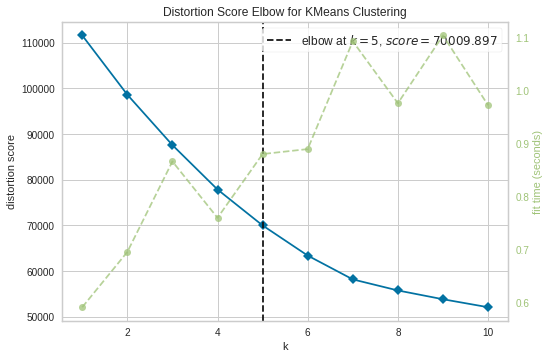

In [15]:
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(bank_cust_scaled) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [16]:
 kmeans = KMeans(n_clusters=5, random_state=0).fit(bank_cust_scaled)
 kmeans.labels_


array([0, 0, 0, ..., 2, 3, 2], dtype=int32)

In [17]:
 prediction = kmeans.predict(bank_cust_scaled)

In [18]:
kmeans.cluster_centers_

array([[-2.05826843e-01, -1.10613612e-01, -2.63990107e-01,
        -1.23616594e-01,  5.43937311e-01,  3.01184338e-02,
         1.75895343e+00,  5.76461009e-01,  5.05779133e-01,
        -6.26263706e-02],
       [-2.28758854e-01, -7.52187174e-02, -8.70871682e-02,
        -1.23616594e-01,  1.01271959e+00,  1.54429506e-01,
        -5.65508720e-01,  1.05372043e-01, -4.60345666e-01,
        -1.87217398e-01],
       [ 4.47992442e-01,  8.12842690e-01,  4.56213935e-01,
        -1.23616594e-01, -7.63352653e-01, -1.60029643e-01,
        -5.09456243e-01, -3.37872187e-01,  6.86518512e-03,
        -7.29453408e-01],
       [-2.10935184e-02, -6.75137790e-01, -1.41472338e-01,
        -1.23616594e-01, -8.70407105e-01, -7.63286431e-02,
        -4.07035346e-01, -2.85873773e-01,  5.15468525e-02,
         1.06512914e+00],
       [-5.71580423e-02, -1.18839560e-01, -8.66320021e-02,
         8.08952880e+00,  8.95976318e-02,  6.18314336e-01,
         2.88868945e-01,  7.68515188e-03,  3.42650731e-01,
        -9.

# **Evaluación**



Combining the predicted clusters with the original Data Frame

In [19]:
bank_cust = bank_cust_copy.reset_index()

In [20]:
clustersDf = pd.DataFrame(prediction)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [21]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin,cluster_predicted
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,50-60,0
1,admin.,married,secondary,no,no,no,unknown,may,unknown,50-60,0
2,technician,married,secondary,no,yes,no,unknown,may,unknown,40-50,0
3,services,married,secondary,no,yes,no,unknown,may,unknown,50-60,0
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,50-60,0


## **Identificación de los clusters**

In [22]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [23]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 0 to 11158
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                2407 non-null   object  
 1   marital            2407 non-null   object  
 2   education          2407 non-null   object  
 3   default            2407 non-null   object  
 4   housing            2407 non-null   object  
 5   loan               2407 non-null   object  
 6   contact            2407 non-null   object  
 7   month              2407 non-null   object  
 8   poutcome           2407 non-null   object  
 9   age_bin            2407 non-null   category
 10  cluster_predicted  2407 non-null   int32   
dtypes: category(1), int32(1), object(9)
memory usage: 200.2+ KB


In [24]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 301 to 11161
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                2831 non-null   object  
 1   marital            2831 non-null   object  
 2   education          2831 non-null   object  
 3   default            2831 non-null   object  
 4   housing            2831 non-null   object  
 5   loan               2831 non-null   object  
 6   contact            2831 non-null   object  
 7   month              2831 non-null   object  
 8   poutcome           2831 non-null   object  
 9   age_bin            2831 non-null   category
 10  cluster_predicted  2831 non-null   int32   
dtypes: category(1), int32(1), object(9)
memory usage: 235.4+ KB


Analizamos la variable *Job* y cómo se distribuye en los diferentes clusters.

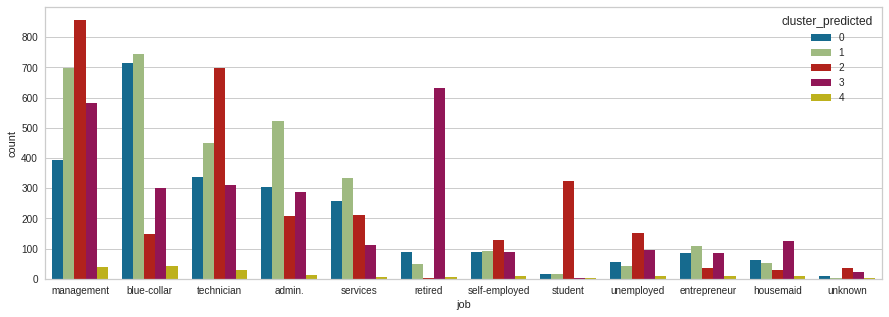

In [25]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Ahora pasamos a la variable *Marital*

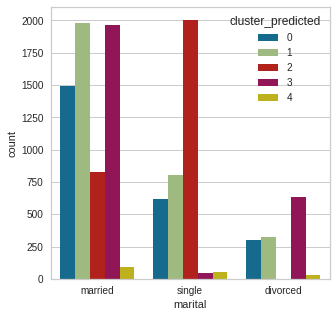

In [26]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Variable *Education*

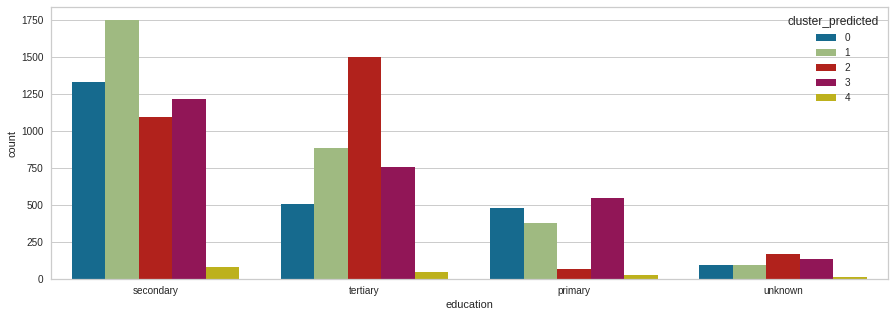

In [27]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Y el resto de variables.

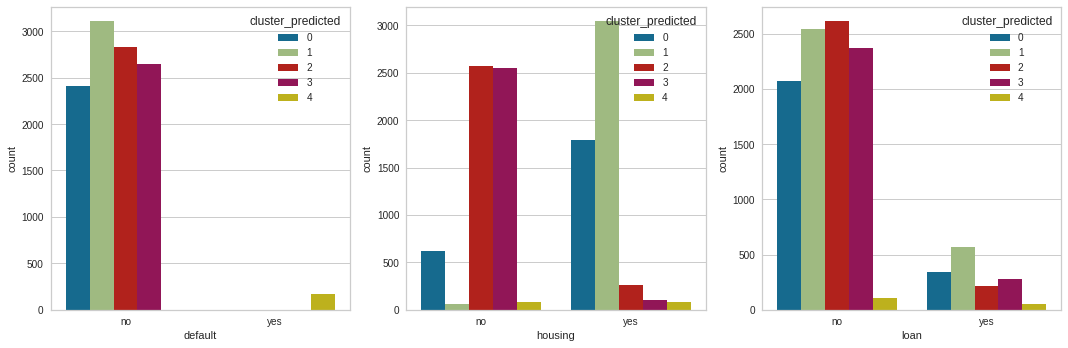

In [28]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

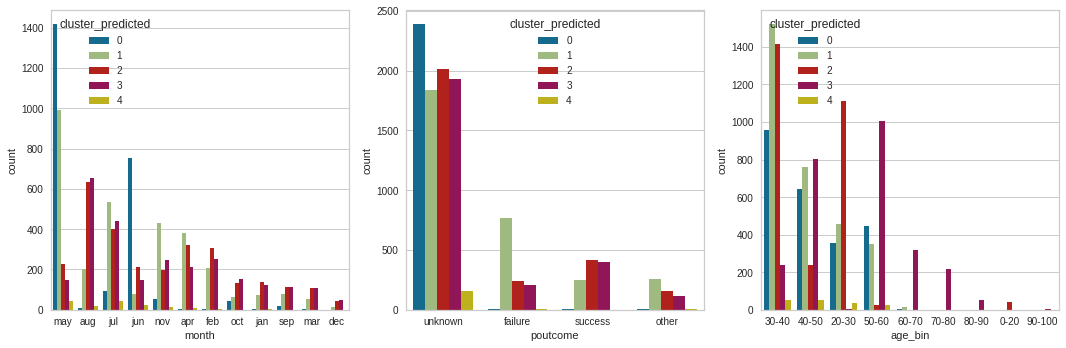

In [29]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])


plt.tight_layout()
plt.show()

In [30]:

import plotly.express as px
from sklearn.decomposition import PCA

df=bank_cust_scaled
pca = PCA()
components = pca.fit_transform(df)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=combinedDf['cluster_predicted'].astype('category')
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [35]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.17 0.15 0.11 0.11 0.1  0.09 0.08 0.08 0.06 0.05]


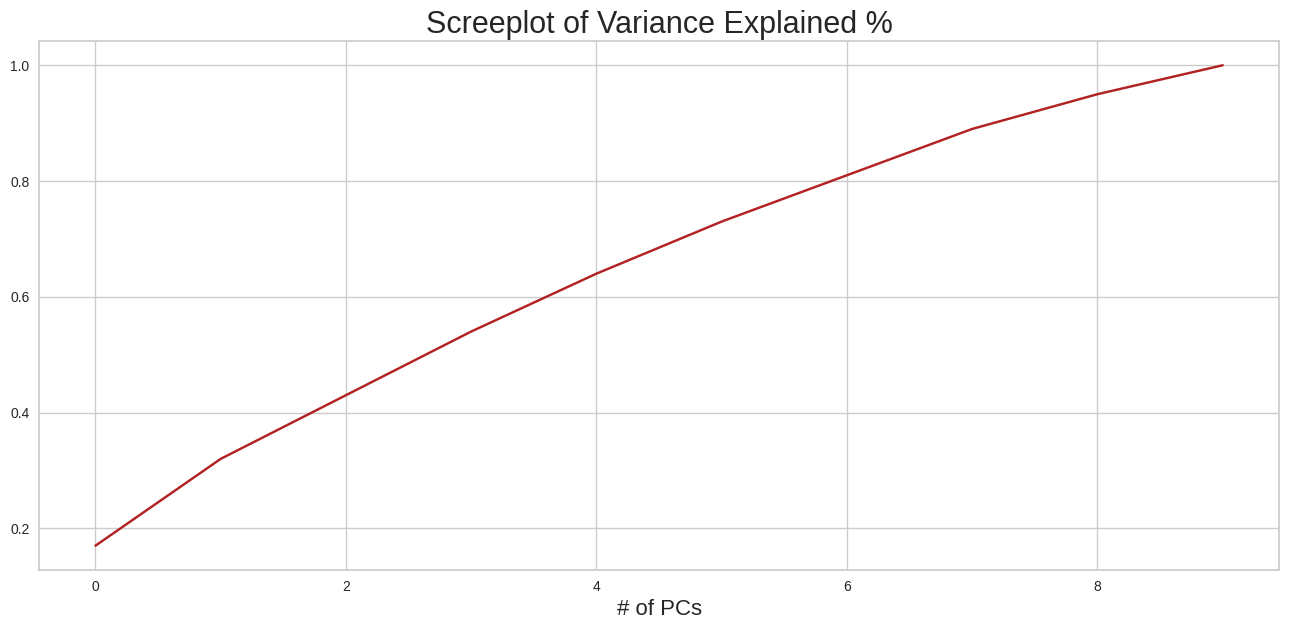

In [36]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()


In [37]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

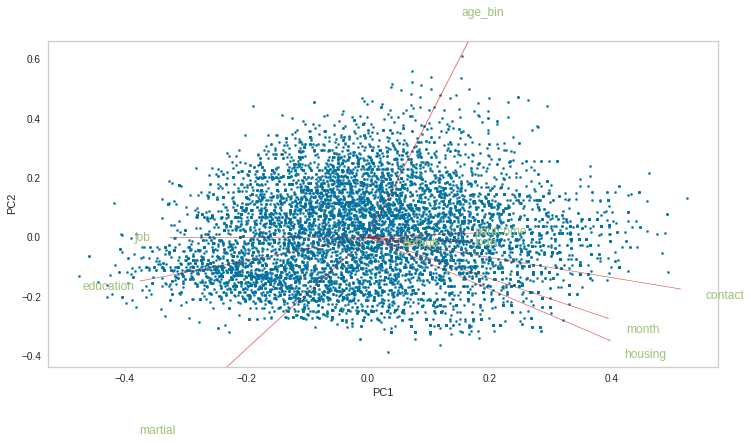

In [51]:
plt.figure(figsize=(12, 6))
biplot(components, np.transpose(pca.components_), list(df.columns))

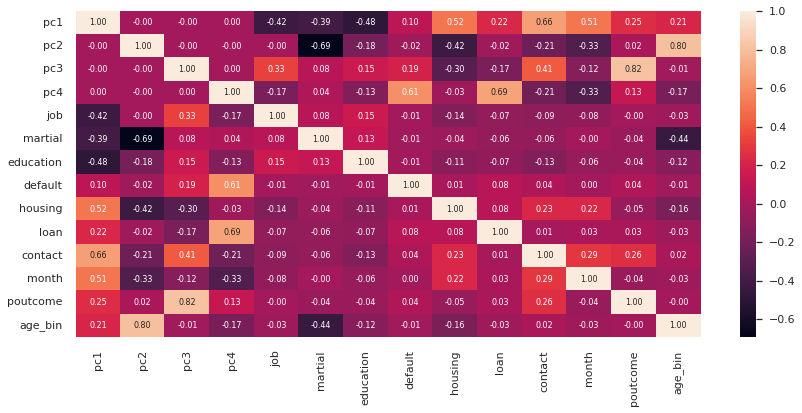

<Figure size 4896x2016 with 0 Axes>

In [74]:
import seaborn as sn
df_pc = pd.DataFrame(data = components, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
df_pc=df_pc.drop(['pc5'],axis=1)
df_pc=df_pc.drop(['pc6'],axis=1)
df_pc=df_pc.drop(['pc7'],axis=1)
df_pc=df_pc.drop(['pc8'],axis=1)
df_pc=df_pc.drop(['pc9'],axis=1)
df_pc=df_pc.drop(['pc10'],axis=1)

df_col = pd.concat([df_pc,df], axis=1)
df_col
corMatrix = pd.DataFrame.corr(df_col)
sn.set(rc={'figure.figsize':(14,6)})
sn.heatmap(corMatrix, annot=True, fmt='.2f', annot_kws={"fontsize":8})
plt.figure(figsize=(68,28))
plt.show()

---
**DSLAB- Isaac Martín de Diego - 2022**


